# Parameter finding

This notebook contains experiments to find out what parameters suit the algorithm best on the Alter Bridge test set.

In [1]:
import os
import time
from itertools import product
from Storage import storage
from recognise import register_directory, recognise_song

ab_source = "/home/cameron/Music/Alter Bridge/"
ab_test = "test/ab/"

In [2]:
# Double checking that monkey-patching storage will change the db location

storage.DB_NAME = "test.db"

storage.setup_db()

print("test.db" in os.listdir())

os.remove("test.db")

True


In [3]:
def run_experiment(sample_rate, distance, effic):
    print(f"--- {sample_rate} - {distance} - {effic} ---")
    db_name = f"ab.{str(sample_rate)}.{str(distance)}.{str(effic)}.db"
    storage.DB_NAME = db_name
    try:
        storage.setup_db()
    except Exception as e:
        print(e)
    
    register_start = time.time()
    register_directory(ab_source, sample_rate=sample_rate, distance=distance, point_efficiency=effic)
    register_end = time.time()
    
    correct = 0
    total = 0
    
    recog_start = time.time()
    for song in os.listdir(ab_test):
        result = recognise_song(ab_test + song, sample_rate=sample_rate, distance=distance, point_efficiency=effic)
        if result is not None:
            result_title = result[2]
            if result_title.replace(" ", "").lower() in song:
                correct += 1
        total += 1
    recog_end = time.time()
    
    print(f"Registered in {register_end - register_start}")
    print(f"Recognised in {recog_end - recog_start}")
    print(f"{correct}/{total}")

In [4]:
sample_rates = [8000, 11025, 22050, 44100]
distances = [100, 80, 60, 40, 30, 20, 10]
effics = [0.4, 0.6, 0.8, 1]

experiments = [
#     (8000, 40, 0.8),
#     (8000, 30, 0.8),
#     (8000, 20, 0.8),
#     (8000, 20, 0.6),
    (11025, 30, 1),
    (11025, 40, 1)
#     (11025, 30, 0.8),
#     (11025, 20, 0.8),
#     (11025, 30, 0.6),
#     (11025, 20, 0.6)
]

import warnings
warnings.filterwarnings('ignore')

for combination in experiments:
    run_experiment(*combination)

--- 11025 - 30 - 1 ---
Registered in 201.33448958396912
Recognised in 1.571753740310669
2/23
--- 11025 - 40 - 1 ---
Registered in 128.60355472564697
Recognised in 0.6396420001983643
10/23


In [2]:
def run_target_experiment(start, t, f):
    print(f"--- {start} - {t} - {f} ---")
    db_name = f"target.{str(start)}.{str(t)}.{str(f)}.db"
    storage.DB_NAME = db_name
    try:
        storage.setup_db()
    except Exception as e:
        print(e)
    
    sample_rate = 11025
    distance = 30
    effic = 0.8
    
    register_start = time.time()
    register_directory(ab_source, sample_rate=sample_rate, distance=distance, point_efficiency=effic,
                      target_start=start, target_t=t, target_f=f)
    register_end = time.time()
    
    correct = 0
    total = 0
    
    recog_start = time.time()
    for song in os.listdir(ab_test):
        result = recognise_song(ab_test + song, sample_rate=sample_rate, distance=distance, point_efficiency=effic,
                               target_start=start, target_t=t, target_f=f)
        if result is not None:
            result_title = result[2]
            if result_title.replace(" ", "").lower() in song:
                correct += 1
        total += 1
    recog_end = time.time()
    
    print(f"Registered in {register_end - register_start}")
    print(f"Recognised in {recog_end - recog_start}")
    print(f"{correct}/{total}")

In [4]:
starts = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
ts = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8]
fs = [500, 1000, 1500, 2000, 3000, 4000]

for combination in product(starts, ts, fs):
    run_target_experiment(*combination)

--- 0.05 - 0.2 - 500 ---
table hash already exists
Registered in 0.02196812629699707
Recognised in 0.5452311038970947
7/23
--- 0.05 - 0.2 - 1000 ---
table hash already exists
Registered in 0.011942148208618164
Recognised in 0.49564075469970703
10/23
--- 0.05 - 0.2 - 1500 ---
table hash already exists
Registered in 0.01271677017211914
Recognised in 0.5436575412750244
10/23
--- 0.05 - 0.2 - 2000 ---
table hash already exists
Registered in 0.014713048934936523
Recognised in 0.5736749172210693
10/23
--- 0.05 - 0.2 - 3000 ---
table hash already exists
Registered in 0.01171565055847168
Recognised in 0.7877547740936279
15/23
--- 0.05 - 0.2 - 4000 ---
table hash already exists
Registered in 0.018571853637695312
Recognised in 0.7313432693481445
15/23
--- 0.05 - 0.4 - 500 ---
table hash already exists
Registered in 0.011928796768188477
Recognised in 0.5496237277984619
8/23
--- 0.05 - 0.4 - 1000 ---
table hash already exists
Registered in 0.012665987014770508
Recognised in 0.567476749420166
12/23

Registered in 0.011991024017333984
Recognised in 0.4701840877532959
6/23
--- 0.1 - 0.6 - 1000 ---
table hash already exists
Registered in 0.012156248092651367
Recognised in 0.6192667484283447
13/23
--- 0.1 - 0.6 - 1500 ---
table hash already exists
Registered in 0.012729406356811523
Recognised in 0.6576321125030518
14/23
--- 0.1 - 0.6 - 2000 ---
table hash already exists
Registered in 0.012055397033691406
Recognised in 0.7733030319213867
16/23
--- 0.1 - 0.6 - 3000 ---
table hash already exists
Registered in 0.012618303298950195
Recognised in 0.9935338497161865
19/23
--- 0.1 - 0.6 - 4000 ---
table hash already exists
Registered in 0.012087106704711914
Recognised in 1.1789145469665527
19/23
--- 0.1 - 0.8 - 500 ---
table hash already exists
Registered in 0.014885663986206055
Recognised in 0.510932445526123
7/23
--- 0.1 - 0.8 - 1000 ---
table hash already exists
Registered in 0.012186527252197266
Recognised in 0.6395385265350342
13/23
--- 0.1 - 0.8 - 1500 ---
table hash already exists
Regi

Registered in 0.015420675277709961
Recognised in 0.5722174644470215
6/23
--- 0.15 - 1 - 1000 ---
table hash already exists
Registered in 0.012149333953857422
Recognised in 0.7632558345794678
15/23
--- 0.15 - 1 - 1500 ---
table hash already exists
Registered in 0.013542652130126953
Recognised in 0.943016767501831
15/23
--- 0.15 - 1 - 2000 ---
table hash already exists
Registered in 0.011858463287353516
Recognised in 1.0853650569915771
17/23
--- 0.15 - 1 - 3000 ---
table hash already exists
Registered in 0.011663436889648438
Recognised in 1.452481985092163
17/23
--- 0.15 - 1 - 4000 ---
table hash already exists
Registered in 0.011436700820922852
Recognised in 1.8154361248016357
17/23
--- 0.15 - 1.2 - 500 ---
table hash already exists
Registered in 0.012204170227050781
Recognised in 0.517831563949585
6/23
--- 0.15 - 1.2 - 1000 ---
table hash already exists
Registered in 0.012164831161499023
Recognised in 0.7539172172546387
15/23
--- 0.15 - 1.2 - 1500 ---
table hash already exists
Register

Registered in 0.012413501739501953
Recognised in 0.5767731666564941
6/23
--- 0.2 - 1.4 - 1000 ---
table hash already exists
Registered in 0.01178741455078125
Recognised in 0.8321266174316406
16/23
--- 0.2 - 1.4 - 1500 ---
table hash already exists
Registered in 0.012089252471923828
Recognised in 1.115652084350586
17/23
--- 0.2 - 1.4 - 2000 ---
table hash already exists
Registered in 0.012023448944091797
Recognised in 1.36391019821167
17/23
--- 0.2 - 1.4 - 3000 ---
table hash already exists
Registered in 0.013257503509521484
Recognised in 1.8743767738342285
18/23
--- 0.2 - 1.4 - 4000 ---
table hash already exists
Registered in 0.012130260467529297
Recognised in 2.3794851303100586
18/23
--- 0.2 - 1.6 - 500 ---
table hash already exists
Registered in 0.012120485305786133
Recognised in 0.6372053623199463
7/23
--- 0.2 - 1.6 - 1000 ---
table hash already exists
Registered in 0.011956930160522461
Recognised in 0.9627940654754639
16/23
--- 0.2 - 1.6 - 1500 ---
table hash already exists
Registe

KeyboardInterrupt: 

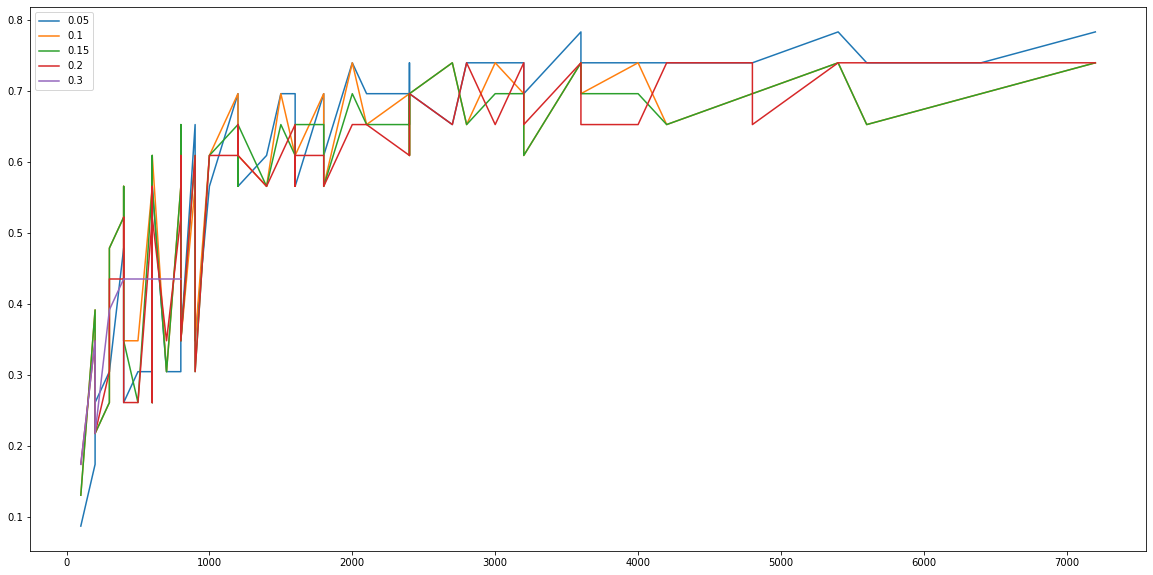

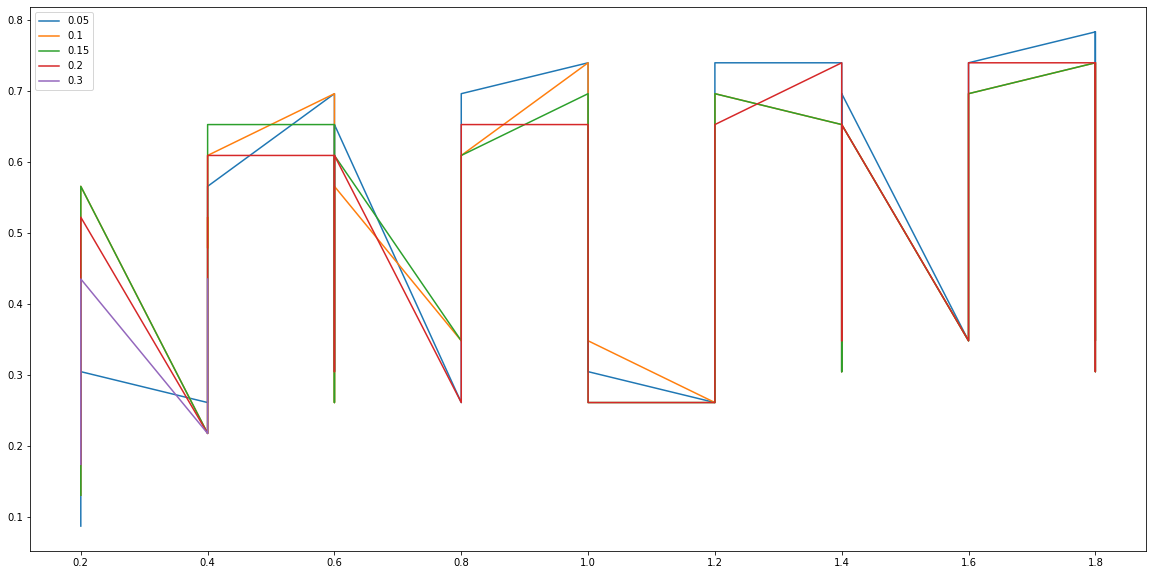

In [37]:
import matplotlib.pyplot as plt
import numpy as np

params = ((0.05, 0.2, 500), (0.05, 0.2, 1000), (0.05, 0.2, 1500), (0.05, 0.2, 2000), (0.05, 0.2, 3000),
          (0.05, 0.2, 4000), (0.05, 0.4, 500), (0.05, 0.4, 1000), (0.05, 0.4, 1500), (0.05, 0.4, 2000),
          (0.05, 0.4, 3000), (0.05, 0.4, 4000), (0.05, 0.6, 500), (0.05, 0.6, 1000), (0.05, 0.6, 1500),
          (0.05, 0.6, 2000), (0.05, 0.6, 3000), (0.05, 0.6, 4000), (0.05, 0.8, 500), (0.05, 0.8, 1000),
          (0.05, 0.8, 1500), (0.05, 0.8, 2000), (0.05, 0.8, 3000), (0.05, 0.8, 4000), (0.05, 1.0, 500),
          (0.05, 1.0, 1000), (0.05, 1.0, 1500), (0.05, 1.0, 2000), (0.05, 1.0, 3000), (0.05, 1.0, 4000),
          (0.05, 1.2, 500), (0.05, 1.2, 1000), (0.05, 1.2, 1500), (0.05, 1.2, 2000), (0.05, 1.2, 3000),
          (0.05, 1.2, 4000), (0.05, 1.4, 500), (0.05, 1.4, 1000), (0.05, 1.4, 1500), (0.05, 1.4, 2000),
          (0.05, 1.4, 3000), (0.05, 1.4, 4000), (0.05, 1.6, 500), (0.05, 1.6, 1000), (0.05, 1.6, 1500),
          (0.05, 1.6, 2000), (0.05, 1.6, 3000), (0.05, 1.6, 4000), (0.05, 1.8, 500), (0.05, 1.8, 1000),
          (0.05, 1.8, 1500), (0.05, 1.8, 2000), (0.05, 1.8, 3000), (0.05, 1.8, 4000), (0.1, 0.2, 500),
          (0.1, 0.2, 1000), (0.1, 0.2, 1500), (0.1, 0.2, 2000), (0.1, 0.2, 3000), (0.1, 0.2, 4000), (0.1, 0.4, 500), (0.1, 0.4, 1000), (0.1, 0.4, 1500), (0.1, 0.4, 2000), (0.1, 0.4, 3000), (0.1, 0.4, 4000), (0.1, 0.6, 500), (0.1, 0.6, 1000), (0.1, 0.6, 1500), (0.1, 0.6, 2000), (0.1, 0.6, 3000), (0.1, 0.6, 4000), (0.1, 0.8, 500), (0.1, 0.8, 1000), (0.1, 0.8, 1500), (0.1, 0.8, 2000), (0.1, 0.8, 3000), (0.1, 0.8, 4000), (0.1, 1.0, 500), (0.1, 1.0, 1000), (0.1, 1.0, 1500), (0.1, 1.0, 2000), (0.1, 1.0, 3000), (0.1, 1.0, 4000), (0.1, 1.2, 500), (0.1, 1.2, 1000), (0.1, 1.2, 1500), (0.1, 1.2, 2000), (0.1, 1.2, 3000), (0.1, 1.2, 4000), (0.1, 1.4, 500), (0.1, 1.4, 1000), (0.1, 1.4, 1500), (0.1, 1.4, 2000), (0.1, 1.4, 3000), (0.1, 1.4, 4000), (0.1, 1.6, 500), (0.1, 1.6, 1000), (0.1, 1.6, 1500), (0.1, 1.6, 2000), (0.1, 1.6, 3000), (0.1, 1.6, 4000), (0.1, 1.8, 500), (0.1, 1.8, 1000), (0.1, 1.8, 1500), (0.1, 1.8, 2000), (0.1, 1.8, 3000), (0.1, 1.8, 4000), (0.15, 0.2, 500), (0.15, 0.2, 1000), (0.15, 0.2, 1500), (0.15, 0.2, 2000), (0.15, 0.2, 3000), (0.15, 0.2, 4000), (0.15, 0.4, 500), (0.15, 0.4, 1000), (0.15, 0.4, 1500), (0.15, 0.4, 2000), (0.15, 0.4, 3000), (0.15, 0.4, 4000), (0.15, 0.6, 500), (0.15, 0.6, 1000), (0.15, 0.6, 1500), (0.15, 0.6, 2000), (0.15, 0.6, 3000), (0.15, 0.6, 4000), (0.15, 0.8, 500), (0.15, 0.8, 1000), (0.15, 0.8, 1500), (0.15, 0.8, 2000), (0.15, 0.8, 3000), (0.15, 0.8, 4000), (0.15, 1.0, 500), (0.15, 1.0, 1000), (0.15, 1.0, 1500), (0.15, 1.0, 2000), (0.15, 1.0, 3000), (0.15, 1.0, 4000), (0.15, 1.2, 500), (0.15, 1.2, 1000), (0.15, 1.2, 1500), (0.15, 1.2, 2000), (0.15, 1.2, 3000), (0.15, 1.2, 4000), (0.15, 1.4, 500), (0.15, 1.4, 1000), (0.15, 1.4, 1500), (0.15, 1.4, 2000), (0.15, 1.4, 3000), (0.15, 1.4, 4000), (0.15, 1.6, 500), (0.15, 1.6, 1000), (0.15, 1.6, 1500), (0.15, 1.6, 2000), (0.15, 1.6, 3000), (0.15, 1.6, 4000), (0.15, 1.8, 500), (0.15, 1.8, 1000), (0.15, 1.8, 1500), (0.15, 1.8, 2000), (0.15, 1.8, 3000), (0.15, 1.8, 4000), (0.2, 0.2, 500), (0.2, 0.2, 1000), (0.2, 0.2, 1500), (0.2, 0.2, 2000), (0.2, 0.2, 3000), (0.2, 0.2, 4000), (0.2, 0.4, 500), (0.2, 0.4, 1000), (0.2, 0.4, 1500), (0.2, 0.4, 2000), (0.2, 0.4, 3000), (0.2, 0.4, 4000), (0.2, 0.6, 500), (0.2, 0.6, 1000), (0.2, 0.6, 1500), (0.2, 0.6, 2000), (0.2, 0.6, 3000), (0.2, 0.6, 4000), (0.2, 0.8, 500), (0.2, 0.8, 1000), (0.2, 0.8, 1500), (0.2, 0.8, 2000), (0.2, 0.8, 3000), (0.2, 0.8, 4000), (0.2, 1.0, 500), (0.2, 1.0, 1000), (0.2, 1.0, 1500), (0.2, 1.0, 2000), (0.2, 1.0, 3000), (0.2, 1.0, 4000), (0.2, 1.2, 500), (0.2, 1.2, 1000), (0.2, 1.2, 1500), (0.2, 1.2, 2000), (0.2, 1.2, 3000), (0.2, 1.2, 4000), (0.2, 1.4, 500), (0.2, 1.4, 1000), (0.2, 1.4, 1500), (0.2, 1.4, 2000), (0.2, 1.4, 3000), (0.2, 1.4, 4000), (0.2, 1.6, 500), (0.2, 1.6, 1000), (0.2, 1.6, 1500), (0.2, 1.6, 2000), (0.2, 1.6, 3000), (0.2, 1.6, 4000), (0.2, 1.8, 500), (0.2, 1.8, 1000), (0.2, 1.8, 1500), (0.2, 1.8, 2000), (0.2, 1.8, 3000), (0.2, 1.8, 4000), (0.3, 0.2, 500), (0.3, 0.2, 1000), (0.3, 0.2, 1500), (0.3, 0.2, 2000), (0.3, 0.2, 3000), (0.3, 0.2, 4000), (0.3, 0.4, 500), (0.3, 0.4, 1000))

register_times = (164.99673199653625, 170.17971324920654, 174.4416060447693, 178.43601751327515, 186.5952503681183, 193.7767117023468, 165.14511609077454, 170.21051740646362, 174.8525059223175, 179.18495726585388, 186.49617099761963, 193.974116563797, 166.58389449119568, 170.60147786140442, 174.6550326347351, 178.80876541137695, 187.34721446037292, 194.3650941848755, 165.19206190109253, 170.1947214603424, 175.04296565055847, 179.19573426246643, 187.28342390060425, 194.26805877685547, 165.04323172569275, 169.73385381698608, 174.97830772399902, 178.5373194217682, 187.37075638771057, 198.25486135482788, 167.0347318649292, 169.43218445777893, 174.65045547485352, 179.44978189468384, 188.0192334651947, 195.61559391021729, 165.64610743522644, 170.17132139205933, 174.82747077941895, 179.4784038066864, 188.0440022945404, 195.38131141662598, 165.5706009864807, 170.49821710586548, 175.74769616127014, 180.0186688899994, 188.81946229934692, 196.10468649864197, 165.24200010299683, 170.53894567489624, 175.6434361934662, 180.6367597579956, 189.1394922733307, 196.28781414031982, 165.4641833305359, 170.37660217285156, 174.56200337409973, 179.0846574306488, 186.96990871429443, 193.72127652168274, 165.05011773109436, 169.93326807022095, 174.73447036743164, 178.8215730190277, 186.97524666786194, 194.05873823165894, 165.26149368286133, 170.00541019439697, 174.7803897857666, 178.529194355011, 187.35871720314026, 194.40341997146606, 165.0662236213684, 169.97259783744812, 174.7373661994934, 179.4593608379364, 186.95523142814636, 194.7949137687683, 165.07246112823486, 170.22081995010376, 175.32785153388977, 179.39146184921265, 187.95229983329773, 194.98289036750793, 165.64329886436462, 170.21835708618164, 174.80627250671387, 179.33223843574524, 188.19433188438416, 195.15705680847168, 165.17380690574646, 170.5346109867096, 174.9370572566986, 179.79359817504883, 189.45946311950684, 197.25360465049744, 166.66187000274658, 171.52104473114014, 176.33984923362732, 181.08073210716248, 189.74306893348694, 197.51721358299255, 166.81227254867554, 171.79448080062866, 177.00921320915222, 182.12538385391235, 190.94879508018494, 198.0862410068512, 167.2245213985443, 171.62086272239685, 176.79306292533875, 180.98159193992615, 188.94626808166504, 195.53011226654053, 166.77204418182373, 172.06741094589233, 176.28481793403625, 181.00364065170288, 188.65302801132202, 195.86813020706177, 167.50044417381287, 171.76055788993835, 176.32652926445007, 180.56659317016602, 189.42971563339233, 196.35662460327148, 167.59246516227722, 171.75962233543396, 177.01333022117615, 181.3731107711792, 189.67743039131165, 197.27873182296753, 167.16029167175293, 172.0186333656311, 177.21334648132324, 181.42723536491394, 190.16951084136963, 196.64598417282104, 167.35312747955322, 172.08139753341675, 176.82214331626892, 181.8541386127472, 190.0159351825714, 197.0528211593628, 166.79096937179565, 171.98727583885193, 176.81072163581848, 182.14551877975464, 189.42627716064453, 197.25496578216553, 167.6905918121338, 172.09201979637146, 177.27391600608826, 181.52174043655396, 190.34827995300293, 197.758686542511, 167.29159450531006, 172.68829107284546, 177.31946063041687, 181.5730357170105, 190.6767611503601, 198.13067269325256, 166.95150470733643, 171.6172173023224, 176.1058485507965, 180.31369161605835, 188.94935083389282, 195.64404344558716, 166.84244418144226, 171.43040204048157, 176.25885248184204, 180.69402885437012, 188.62000465393066, 196.18305945396423, 167.39924430847168, 171.94058752059937, 176.8808081150055, 182.44686245918274, 188.89308667182922, 196.31425285339355, 167.17834520339966, 171.9888985157013, 176.64621567726135, 181.07734847068787, 189.255952835083, 196.383549451828, 167.0883870124817, 171.65162825584412, 176.61259007453918, 181.3656725883484, 189.57351970672607, 196.56049847602844, 166.9746606349945, 171.75807189941406, 176.6464068889618, 181.65292596817017, 189.4863519668579, 196.64095640182495, 166.94459176063538, 172.16821885108948, 178.04455018043518, 184.619713306427, 189.53896260261536, 196.8947503566742, 166.19998216629028, 172.0305666923523, 176.30149030685425, 181.32485556602478, 189.6916642189026, 197.38082766532898, 166.60183143615723, 171.69487500190735, 177.26345372200012, 181.90139365196228, 190.13761711120605, 197.6924729347229, 166.73493719100952, 171.73115944862366, 175.88626980781555, 180.2860128879547, 188.0896966457367, 195.52377653121948, 168.25973439216614, 170.8882598876953)

recog_times = (0.46808576583862305, 0.5442490577697754, 0.5927197933197021, 0.6256492137908936, 0.6812102794647217, 0.7339293956756592, 0.5172009468078613, 0.598574161529541, 0.6793262958526611, 0.7627303600311279, 0.9087491035461426, 1.0330045223236084, 0.5025491714477539, 0.6336445808410645, 0.7500524520874023, 0.8692779541015625, 1.0671124458312988, 1.24033522605896, 0.5220465660095215, 0.683546781539917, 0.8258481025695801, 0.9543731212615967, 1.1921980381011963, 1.4035499095916748, 0.5411806106567383, 0.7260539531707764, 0.9017438888549805, 1.0428876876831055, 1.3604981899261475, 1.7415246963500977, 0.5593836307525635, 0.7890362739562988, 0.9941191673278809, 1.2041490077972412, 1.6036961078643799, 1.8899598121643066, 0.6041824817657471, 0.8454329967498779, 1.1086421012878418, 1.3151240348815918, 1.7392518520355225, 2.068805694580078, 0.6782357692718506, 0.912078857421875, 1.2046923637390137, 1.4248483180999756, 1.9219708442687988, 2.3399906158447266, 0.6867115497589111, 1.0195281505584717, 1.3794560432434082, 1.6776587963104248, 2.1936073303222656, 2.682389497756958, 0.4591217041015625, 0.5263452529907227, 0.5832483768463135, 0.589235782623291, 0.6467843055725098, 0.6935625076293945, 0.5103826522827148, 0.606224775314331, 0.6677539348602295, 0.6984550952911377, 0.8086459636688232, 0.8918545246124268, 0.5254161357879639, 0.6175699234008789, 0.7047665119171143, 0.795541524887085, 0.9489960670471191, 1.094181776046753, 0.5417876243591309, 0.6645574569702148, 0.8085181713104248, 0.959538459777832, 1.1698212623596191, 1.3869314193725586, 0.5608668327331543, 0.7294611930847168, 0.8830523490905762, 1.044053077697754, 1.310610055923462, 1.5536675453186035, 0.557136058807373, 0.7516615390777588, 0.9285356998443604, 1.1320555210113525, 1.4451754093170166, 1.7417221069335938, 0.6066286563873291, 0.8501982688903809, 1.093170404434204, 1.298741340637207, 1.7181017398834229, 2.0522632598876953, 0.645815372467041, 0.9172263145446777, 1.193758249282837, 1.4529502391815186, 1.919823408126831, 2.307690382003784, 0.6832437515258789, 0.991873025894165, 1.293027400970459, 1.5810480117797852, 2.1067020893096924, 2.5425631999969482, 0.4684004783630371, 0.5111193656921387, 0.5535969734191895, 0.5878467559814453, 0.6543829441070557, 0.6824414730072021, 0.4822664260864258, 0.5946736335754395, 0.6630191802978516, 0.7379007339477539, 0.8698339462280273, 0.9942185878753662, 0.5044004917144775, 0.6552577018737793, 0.736382007598877, 0.8415648937225342, 1.0196962356567383, 1.1900584697723389, 0.5118231773376465, 0.6719670295715332, 0.8019742965698242, 0.9632189273834229, 1.1697793006896973, 1.371269941329956, 0.5426487922668457, 0.7283153533935547, 0.9099864959716797, 1.0898120403289795, 1.363281011581421, 1.6715333461761475, 0.5772671699523926, 0.7647473812103271, 0.9806563854217529, 1.1765437126159668, 1.5461037158966064, 1.8530583381652832, 0.6046633720397949, 0.8691563606262207, 1.0940461158752441, 1.2885866165161133, 1.7172346115112305, 2.067692518234253, 0.6480636596679688, 0.9217445850372314, 1.1869709491729736, 1.4616265296936035, 1.930030345916748, 2.307872772216797, 0.7028012275695801, 1.047037124633789, 1.3560683727264404, 1.638211965560913, 2.207745313644409, 2.656154155731201, 0.45900774002075195, 0.5067031383514404, 0.5479898452758789, 0.5761227607727051, 0.628347635269165, 0.6782526969909668, 0.47240686416625977, 0.5623509883880615, 0.6370389461517334, 0.6842341423034668, 0.7820911407470703, 0.8936614990234375, 0.491715669631958, 0.6289184093475342, 0.7332284450531006, 0.8364386558532715, 0.9986286163330078, 1.1570191383361816, 0.5176315307617188, 0.6571590900421143, 0.8187234401702881, 0.9336633682250977, 1.152190923690796, 1.3671433925628662, 0.5242414474487305, 0.7011914253234863, 0.8566365242004395, 1.0238208770751953, 1.3077967166900635, 1.542177438735962, 0.5557951927185059, 0.7456240653991699, 0.9428060054779053, 1.129446029663086, 1.4499728679656982, 1.7496397495269775, 0.6939191818237305, 0.8523459434509277, 1.177379846572876, 1.3139333724975586, 1.7241182327270508, 2.0805437564849854, 0.6463079452514648, 0.929166316986084, 1.2004868984222412, 1.4435486793518066, 1.903778314590454, 2.3240551948547363, 0.6827597618103027, 0.9860153198242188, 1.308075189590454, 1.6337840557098389, 2.110257625579834, 2.5566513538360596, 0.4452526569366455, 0.5165352821350098, 0.5571682453155518, 0.5839138031005859, 0.6486072540283203, 0.6963183879852295, 0.4698011875152588, 0.5503931045532227)

accuracies = (0.08695652173913043, 0.17391304347826086, 0.30434782608695654, 0.30434782608695654, 0.30434782608695654, 0.30434782608695654, 0.2608695652173913, 0.4782608695652174, 0.5652173913043478, 0.5652173913043478, 0.5652173913043478, 0.5652173913043478, 0.30434782608695654, 0.5652173913043478, 0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.2608695652173913, 0.5217391304347826, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.30434782608695654, 0.5652173913043478, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.2608695652173913, 0.5652173913043478, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.30434782608695654, 0.6086956521739131, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.34782608695652173, 0.6086956521739131, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.34782608695652173, 0.6086956521739131, 0.6521739130434783, 0.782608695652174, 0.782608695652174, 0.782608695652174, 0.13043478260869565, 0.391304347826087, 0.4782608695652174, 0.5652173913043478, 0.5652173913043478, 0.5652173913043478, 0.21739130434782608, 0.5217391304347826, 0.4782608695652174, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.2608695652173913, 0.6086956521739131, 0.5652173913043478, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.34782608695652173, 0.5652173913043478, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.34782608695652173, 0.6086956521739131, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.2608695652173913, 0.6086956521739131, 0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.30434782608695654, 0.5652173913043478, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.34782608695652173, 0.5652173913043478, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.34782608695652173, 0.5652173913043478, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.13043478260869565, 0.391304347826087, 0.4782608695652174, 0.5652173913043478, 0.5652173913043478, 0.5652173913043478, 0.21739130434782608, 0.5217391304347826, 0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.2608695652173913, 0.5652173913043478, 0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.34782608695652173, 0.5652173913043478, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.2608695652173913, 0.6086956521739131, 0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.2608695652173913, 0.5652173913043478, 0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.30434782608695654, 0.5652173913043478, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.34782608695652173, 0.5652173913043478, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.30434782608695654, 0.5652173913043478, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.17391304347826086, 0.34782608695652173, 0.43478260869565216, 0.5217391304347826, 0.5217391304347826, 0.5217391304347826, 0.21739130434782608, 0.43478260869565216, 0.5652173913043478, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.30434782608695654, 0.5217391304347826, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.6086956521739131, 0.2608695652173913, 0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.2608695652173913, 0.6086956521739131, 0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.2608695652173913, 0.6086956521739131, 0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.34782608695652173, 0.5652173913043478, 0.6521739130434783, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.34782608695652173, 0.5652173913043478, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.30434782608695654, 0.5652173913043478, 0.6521739130434783, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.17391304347826086, 0.34782608695652173, 0.391304347826087, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216, 0.21739130434782608, 0.43478260869565216)

curr_start = 0.05
tf_area_by_start = []
t_by_start = []
temp = []
t_temp = []

for idx, (start, t, f) in enumerate(params):
    if start != curr_start:
        tf_area_by_start.append(temp)
        t_by_start.append(t_temp)
        temp = []
        t_temp = []
    temp.append(t * f)
    t_temp.append(t)
    curr_start = start
tf_area_by_start.append(temp)
t_by_start.append(t_temp)

lens = [len(a) for a in tf_area_by_start]

split_accs = []
idx = 0
for l in lens:
    split_accs.append(accuracies[idx:idx+l])
    idx += l

plt.figure(figsize=(20, 10))
for idx in range(len(split_accs)):
    tf_area = np.array(tf_area_by_start[idx])
    accs_idxs = np.argsort(tf_area)
    tf_area = tf_area[accs_idxs]
    accs = np.array(split_accs[idx])[accs_idxs]
    plt.plot(tf_area, accs)
plt.legend([str(s) for s in starts])
plt.show()

# be nice to average for t, but too complicated for now
plt.figure(figsize=(20, 10))
for idx in range(len(split_accs)):
    ts = np.array(t_by_start[idx])
    accs_idxs = np.argsort(ts)
    ts = ts[accs_idxs]
    accs = np.array(split_accs[idx])[accs_idxs]
    plt.plot(ts, accs)
plt.legend([str(s) for s in starts])
plt.show()

In [5]:
# 0.05 was the best start value and accuracy increased with time

starts = [0.05]
ts = [2, 3]
fs = [1500, 2000]

for combination in product(starts, ts, fs):
    run_target_experiment(*combination)

--- 0.05 - 2 - 1500 ---
table hash already exists
Registered in 0.014687299728393555
Recognised in 1.583617925643921
16/23
--- 0.05 - 2 - 2000 ---
table hash already exists
Registered in 0.011797666549682617
Recognised in 1.964655876159668
18/23
--- 0.05 - 3 - 1500 ---
table hash already exists
Registered in 0.011796951293945312
Recognised in 2.2191882133483887
19/23
--- 0.05 - 3 - 2000 ---
table hash already exists
Registered in 0.011746644973754883
Recognised in 2.868907928466797
19/23


In [9]:
# Dejavu uses 4096 nperseg default. I'm using 800/1100. Let's test increasing that

def run_window_size_experiment(window_size, distance, sample_rate):
    print(f"--- {window_size} - {distance} - {sample_rate} ---")
    db_name = f"window.{str(window_size)}.{str(distance)}.{str(sample_rate)}.db"
    storage.DB_NAME = db_name
    try:
        storage.setup_db()
    except Exception as e:
        print(e)
    
    start = 0.05
    t = 1.8
    f = 4000
    effic = 0.8
    
    register_start = time.time()
    register_directory(ab_source, sample_rate=sample_rate, distance=distance, point_efficiency=effic,
                      target_start=start, target_t=t, target_f=f, fft_window_size_s=window_size)
    register_end = time.time()
    
    correct = 0
    total = 0
    
    recog_start = time.time()
    for song in os.listdir(ab_test):
        result = recognise_song(ab_test + song, sample_rate=sample_rate, distance=distance, point_efficiency=effic,
                               target_start=start, target_t=t, target_f=f, fft_window_size_s=window_size)
        if result is not None:
            result_title = result[2]
            if result_title.replace(" ", "").lower() in song:
                correct += 1
        total += 1
    recog_end = time.time()
    
    print(f"Registered in {register_end - register_start}")
    print(f"Recognised in {recog_end - recog_start}")
    print(f"{correct}/{total}")
    
window_sizes=[0.15, 0.2, 0.25, 0.3]
distances=[30, 20]
sample_rates=[8000, 11025]

for combination in product(window_sizes, distances, sample_rates):
    run_window_size_experiment(*combination)

--- 0.15 - 30 - 8000 ---
Registered in 157.63882541656494
Recognised in 2.005615472793579
15/23
--- 0.15 - 30 - 11025 ---


KeyboardInterrupt: 

In [14]:
# The above suggests to me that it's not the FFT window size in seconds that should be varied, but the sample rate.
# 4096 ~= 0.1 * 44100
# So let's run the best experiment from before at sample rates up to 44100

sample_rates = [8000, 11025, 22050, 33075, 44100]

def run_sr_exp(sample_rate, print_wrong=False):
    print(f"--- {sample_rate} ---")
    db_name = f"sr.{str(sample_rate)}.db"
    storage.DB_NAME = db_name
    try:
        storage.setup_db()
    except Exception as e:
        print(e)
    
    window_size = 0.1
    distance = 30
    start = 0.05
    t = 1.8
    f = 4000
    effic = 0.8
    
    register_start = time.time()
    register_directory(ab_source, sample_rate=sample_rate, distance=distance, point_efficiency=effic,
                      target_start=start, target_t=t, target_f=f, fft_window_size_s=window_size)
    register_end = time.time()
    
    correct = 0
    total = 0
    
    recog_start = time.time()
    for song in os.listdir(ab_test):
        result = recognise_song(ab_test + song, sample_rate=sample_rate, distance=distance, point_efficiency=effic,
                               target_start=start, target_t=t, target_f=f, fft_window_size_s=window_size)
        if result is not None:
            result_title = result[2]
            if result_title.replace(" ", "").lower() in song:
                correct += 1
            elif print_wrong:
                print(f"{song} - {result}")
        total += 1
    recog_end = time.time()
    
    print(f"Registered in {register_end - register_start}")
    print(f"Recognised in {recog_end - recog_start}")
    print(f"{correct}/{total}")
    
for sr in sample_rates:
    if sr > 20000:
        run_sr_exp(sr, print_wrong=True)
    else:
        run_sr_exp(sr)

--- 8000 ---
table hash already exists
Registered in 0.018313169479370117
Recognised in 5.78671932220459
46/75
--- 11025 ---
table hash already exists
Registered in 0.011539697647094727
Recognised in 10.242461681365967
55/75
--- 22050 ---
table hash already exists
addictedtopain7.wav - ('Alter Bridge', 'AB III.5 (Special Edition)', 'Never Born To Follow [Bonus Track]')
lover7.wav - ('Alter Bridge', 'Blackbird', 'Before Tomorrow Comes')
peaceisbroken3.wav - ('Alter Bridge', 'Fortress', 'Fortress')
stillremains3.wav - ('Alter Bridge', 'Fortress', 'All Ends Well')
makeitright3.wav - ('Alter Bridge', 'Fortress', 'Lover')
addictedtopain2.wav - ('Alter Bridge', 'AB III.5 (Special Edition)', 'Never Born To Follow [Bonus Track]')
onedayremains2(loud).wav - ('Alter Bridge', 'AB III.5 (Special Edition)', 'Show Me A Sign')
wonderfullife1.wav - ('Alter Bridge', 'Blackbird', 'Watch Over You')
Registered in 0.012126684188842773
Recognised in 22.16290855407715
67/75
--- 33075 ---
table hash already e

# T values results

--- 0 - 2 - 1500 ---  
Registered in 179.06390690803528  
Recognised in 1.9747602939605713  
14/23

--- 0 - 2 - 2000 ---  
Registered in 183.11170268058777  
Recognised in 2.1971113681793213  
18/23

--- 0 - 2 - 4000 ---  
Registered in 199.6536512374878  
Recognised in 3.3521742820739746  
18/23

--- 0 - 3 - 1500 ---  
Registered in 179.4144411087036  
Recognised in 2.4619314670562744  
12/23

--- 0 - 3 - 2000 ---  
Registered in 184.22106385231018  
Recognised in 2.9784188270568848  
12/23

--- 0 - 3 - 4000 ---  
Registered in 201.36147689819336  
Recognised in 4.763943195343018  
12/23

--- 0 - 4 - 1500 ---  
Registered in 179.86129593849182  
Recognised in 2.9749178886413574  
11/23

--- 0.05 - 2 - 1500 ---  
Registered in 182.78014659881592  
Recognised in 1.4557509422302246  
16/23

--- 0.05 - 2 - 2000 ---  
Registered in 188.05589866638184  
Recognised in 1.8884634971618652  
17/23

--- 0.05 - 2 - 4000 ---  
Registered in 212.9802942276001  
Recognised in 2.9373867511749268  
17/23

--- 0.05 - 3 - 1500 ---  
Registered in 187.53493666648865  
Recognised in 2.0080630779266357  
13/23

--- 0.05 - 3 - 2000 ---  
Registered in 189.67788124084473  
Recognised in 2.6220293045043945  
14/23

# Results for filter-only system

--- 8000 - 20 - 1 ---  
Registered in 998.3773756027222  
Recognised in 16.880050659179688  
DB size: 109MB  
1/23

--- 8000 - 40 - 0.8 ---  
Registered in 749.5723993778229  
Recognised in 11.16202163696289  
DB size: 1.9MB  
12/23

--- 8000 - 30 - 0.8 ---  
Registered in 792.8214745521545  
Recognised in 11.183043718338013  
DB size: 6.4MB  
15/23

--- 8000 - 20 - 0.8 ---  
Registered in 963.8891518115997  
Recognised in 12.440717458724976  
DB size: 36.7MB  
14/23

--- 11025 - 30 - 0.8 ---  
Registered in 836.6497547626495  
Recognised in 10.465205192565918  
DB size: 9.2MB  
17/23

--- 11025 - 20 - 0.8 ---  
Registered in 1197.4548382759094  
Recognised in 14.807997226715088  
DB size: 51.6MB  
11/23

--- 11025 - 30 - 0.6 ---  
Registered in 828.729695558548  
Recognised in 10.084702730178833  
DB size: 6.4MB  
14/23

--- 11025 - 20 - 0.6 ---  
Registered in 988.5258002281189  
Recognised in 12.504960060119629  
DB size: 35.7MB  
15/23

# Results

--- 11025 - 100 - 1 ---  
table hash already exists  
Registered in 0.01360774040222168  (disregard)  
Recognised in 10.491904973983765  
DB size: 41KB  
0/23  

--- 22050 - 100 - 1 ---  
table hash already exists  
Registered in 1262.1615462303162  (disregard)  
Recognised in 11.41413950920105  
DB size:69.6KB  
0/23  

--- 8000 - 80 - 1 ---  
Registered in 871.026887178421  
Recognised in 10.49630856513977  
DB size: 114.7KB  
2/23  

--- 11025 - 80 - 1 ---  
Registered in 1085.9251141548157  
Recognised in 10.337523221969604  
DB size: 155.6KB  
2/23  

--- 22050 - 80 - 1 ---  
Registered in 2631.189598798752  
Recognised in 11.591015100479126  
DB size: 315.4KB  
3/23  

--- 8000 - 60 - 1 ---  
Registered in 1035.1952967643738  
Recognised in 10.302856206893921  
DB size: 462.8KB  
6/23  

--- 11025 - 60 - 1 ---  
Registered in 1499.951516866684  
Recognised in 10.36367416381836  
DB size: 659.5KB  
6/23  

--- 22050 - 60 - 1 ---  
Registered in 4653.212627410889  
Reocgnised in 14.965532779693604  
DB size: 1.3MB  
4/23  

--- 8000 - 40 - 1 ---  
table hash already exists  
Registered in 1345.698034286499 (disregard)  
Reocgnised in 10.522676706314087  
DB size: 2.9MB  
8/23  

--- 11025 - 40 - 1 ---  
Registered in 2824.5735189914703  
Reocgnised in 11.528959512710571  
DB size: 4.2MB  
10/23

--- 8000 - 40 - 0.8 ---  
Registered in 1039.969381570816  
Reocgnised in 10.362302541732788  
DB size: 2.1MB  
8/23

--- 11025 - 40 - 0.8 ---  
Registered in 1330.6944749355316  
Reocgnised in 11.005693197250366  
DB size: 3.0MB  
10/23

--- 8000 - 30 - 0.8 ---  
Registered in 1340.6740520000458  
Reocgnised in 10.804935932159424  
DB size: 7.2MB  
10/23

--- 11025 - 30 - 0.8 ---  
Registered in 2156.1384823322296  
Reocgnised in 11.699687480926514  
DB size: 10.6MB  
16/23

--- 8000 - 30 - 0.6 ---  
Registered in 1053.5320749282837  
Reocgnised in 10.512482643127441  
DB size: 4.6MB  
12/23

--- 11025 - 30 - 0.6 ---  
table hash already exists  
Registered in 164.92928767204285  (disregard)  
Recognised in 10.794238328933716  
DB size: 6.9MB  
15/23

--- 8000 - 30 - 0.4 ---  
Registered in 772.6764483451843  
Recognised in 9.62196660041809  
DB size: 2.5MB  
8/23  

--- 11025 - 30 - 0.4 ---  
Registered in 915.1520311832428  
Recognised in 10.631599187850952  
DB size: 4MB  
7/23

--- 8000 - 20 - 0.8 ---  
Registered in 2837.757476568222  
Recognised in 13.248492956161499  
DB size: 40.9MB  
17/23

--- 11025 - 20 - 0.8 ---  
Registered in 5331.4960470199585  
Recognised in 18.02258563041687  
DB size: 59.9MB  
14/23

--- 8000 - 20 - 0.6 ---  
Registered in 1409.9551482200623  
Recognised in 11.146695375442505  
DB size: 25.7MB  
12/23

--- 11025 - 20 - 0.6 ---  
Registered in 2393.639583349228  
Recognised in 14.41548752784729  
DB size: 38.7MB  
14/23

--- 8000 - 20 - 0.4 ---  
Registered in 1011.3017525672913  
Recognised in 10.743085861206055  
DB size: 13.9MB  
8/23

--- 11025 - 20 - 0.4 ---  
Registered in 1331.1678903102875  
Recognised in 11.768644332885742  
DB size: 21.5MB  
14/23

--- 8000 - 10 - 0.6 ---  
Registered in 9110.89660859108  
Recognised in 72.38367867469788  
DB size: 434.8MB  
2/23

--- 8000 - 10 - 0.4 ---  
Registered in 3994.666673898697  
Recognised in 35.60861873626709  
DB size: 221.9MB  
3/23  